In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #used to create statistical graphics and perform exploratory analysis on data:
sns.set()  #the images of your plots will become much nicer
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/diseases /Training.csv")
df_test = pd.read_csv("/content/drive/MyDrive/diseases /Testing.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
df_test.head()  #return a specified no of row from top

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [7]:
df_train.info(max_cols=134)  #info() method prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 134 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    itching                         4920 non-null   int64  
 1    skin_rash                       4920 non-null   int64  
 2    nodal_skin_eruptions            4920 non-null   int64  
 3    continuous_sneezing             4920 non-null   int64  
 4    shivering                       4920 non-null   int64  
 5    chills                          4920 non-null   int64  
 6    joint_pain                      4920 non-null   int64  
 7    stomach_pain                    4920 non-null   int64  
 8    acidity                         4920 non-null   int64  
 9    ulcers_on_tongue                4920 non-null   int64  
 10   muscle_wasting                  4920 non-null   int64  
 11   vomiting                        4920 non-null   int64  
 12   burning_micturitio

In [8]:
df_train.info(max_cols=134)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 134 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    itching                         4920 non-null   int64  
 1    skin_rash                       4920 non-null   int64  
 2    nodal_skin_eruptions            4920 non-null   int64  
 3    continuous_sneezing             4920 non-null   int64  
 4    shivering                       4920 non-null   int64  
 5    chills                          4920 non-null   int64  
 6    joint_pain                      4920 non-null   int64  
 7    stomach_pain                    4920 non-null   int64  
 8    acidity                         4920 non-null   int64  
 9    ulcers_on_tongue                4920 non-null   int64  
 10   muscle_wasting                  4920 non-null   int64  
 11   vomiting                        4920 non-null   int64  
 12   burning_micturitio

In [9]:
df_train.describe()  #describe() method returns description of the data in the DataFrame

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [10]:
df_test.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,...,0.023810,0.023810,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.023810
std,0.377195,0.397437,0.154303,0.215540,0.154303,0.377195,0.354169,0.215540,0.215540,0.154303,...,0.154303,0.154303,0.154303,0.215540,0.154303,0.154303,0.154303,0.154303,0.215540,0.154303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_train = df_train.drop("Unnamed: 133", axis=1) #drop a column (for rows, you'd use axis=0).

In [12]:
df_train.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [13]:
df_train.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [14]:
for col in df_train:
    print(f"{col} has {df_train[col].unique()}")  #The unique values present in that column, which is returned by the pandas method
    # itching column, 1 might mean "skin rash present" and 0 means "skin rash absent."

itching has [1 0]
skin_rash has [1 0]
nodal_skin_eruptions has [1 0]
continuous_sneezing has [0 1]
shivering has [0 1]
chills has [0 1]
joint_pain has [0 1]
stomach_pain has [0 1]
acidity has [0 1]
ulcers_on_tongue has [0 1]
muscle_wasting has [0 1]
vomiting has [0 1]
burning_micturition has [0 1]
spotting_ urination has [0 1]
fatigue has [0 1]
weight_gain has [0 1]
anxiety has [0 1]
cold_hands_and_feets has [0 1]
mood_swings has [0 1]
weight_loss has [0 1]
restlessness has [0 1]
lethargy has [0 1]
patches_in_throat has [0 1]
irregular_sugar_level has [0 1]
cough has [0 1]
high_fever has [0 1]
sunken_eyes has [0 1]
breathlessness has [0 1]
sweating has [0 1]
dehydration has [0 1]
indigestion has [0 1]
headache has [0 1]
yellowish_skin has [0 1]
dark_urine has [0 1]
nausea has [0 1]
loss_of_appetite has [0 1]
pain_behind_the_eyes has [0 1]
back_pain has [0 1]
constipation has [0 1]
abdominal_pain has [0 1]
diarrhoea has [0 1]
mild_fever has [0 1]
yellow_urine has [0 1]
yellowing_of_eyes

In [15]:
  df_train['prognosis'].nunique() #ind the number of unique values in the column 'prognosis'

41

In [16]:
pd.DataFrame(df_train["prognosis"].value_counts()) #There are 41 diseases in a column prognosis

,count
prognosis,
Fungal infection,120
Hepatitis C,120
Hepatitis E,120
Alcoholic hepatitis,120
Tuberculosis,120
Common Cold,120
Pneumonia,120
Dimorphic hemmorhoids(piles),120
Heart attack,120


In [17]:
df_train[df_train.prognosis == "Pneumonia"] #View only people with pneumonia from the column prognosis

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
270,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
271,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
272,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
274,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
4783,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
4824,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
4865,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia


In [18]:
df_train[df_train.prognosis == "Allergy"] #View only allergy from the column prognosis

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
10,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
11,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
12,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
13,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
14,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4716,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
4757,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
4798,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
4839,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy


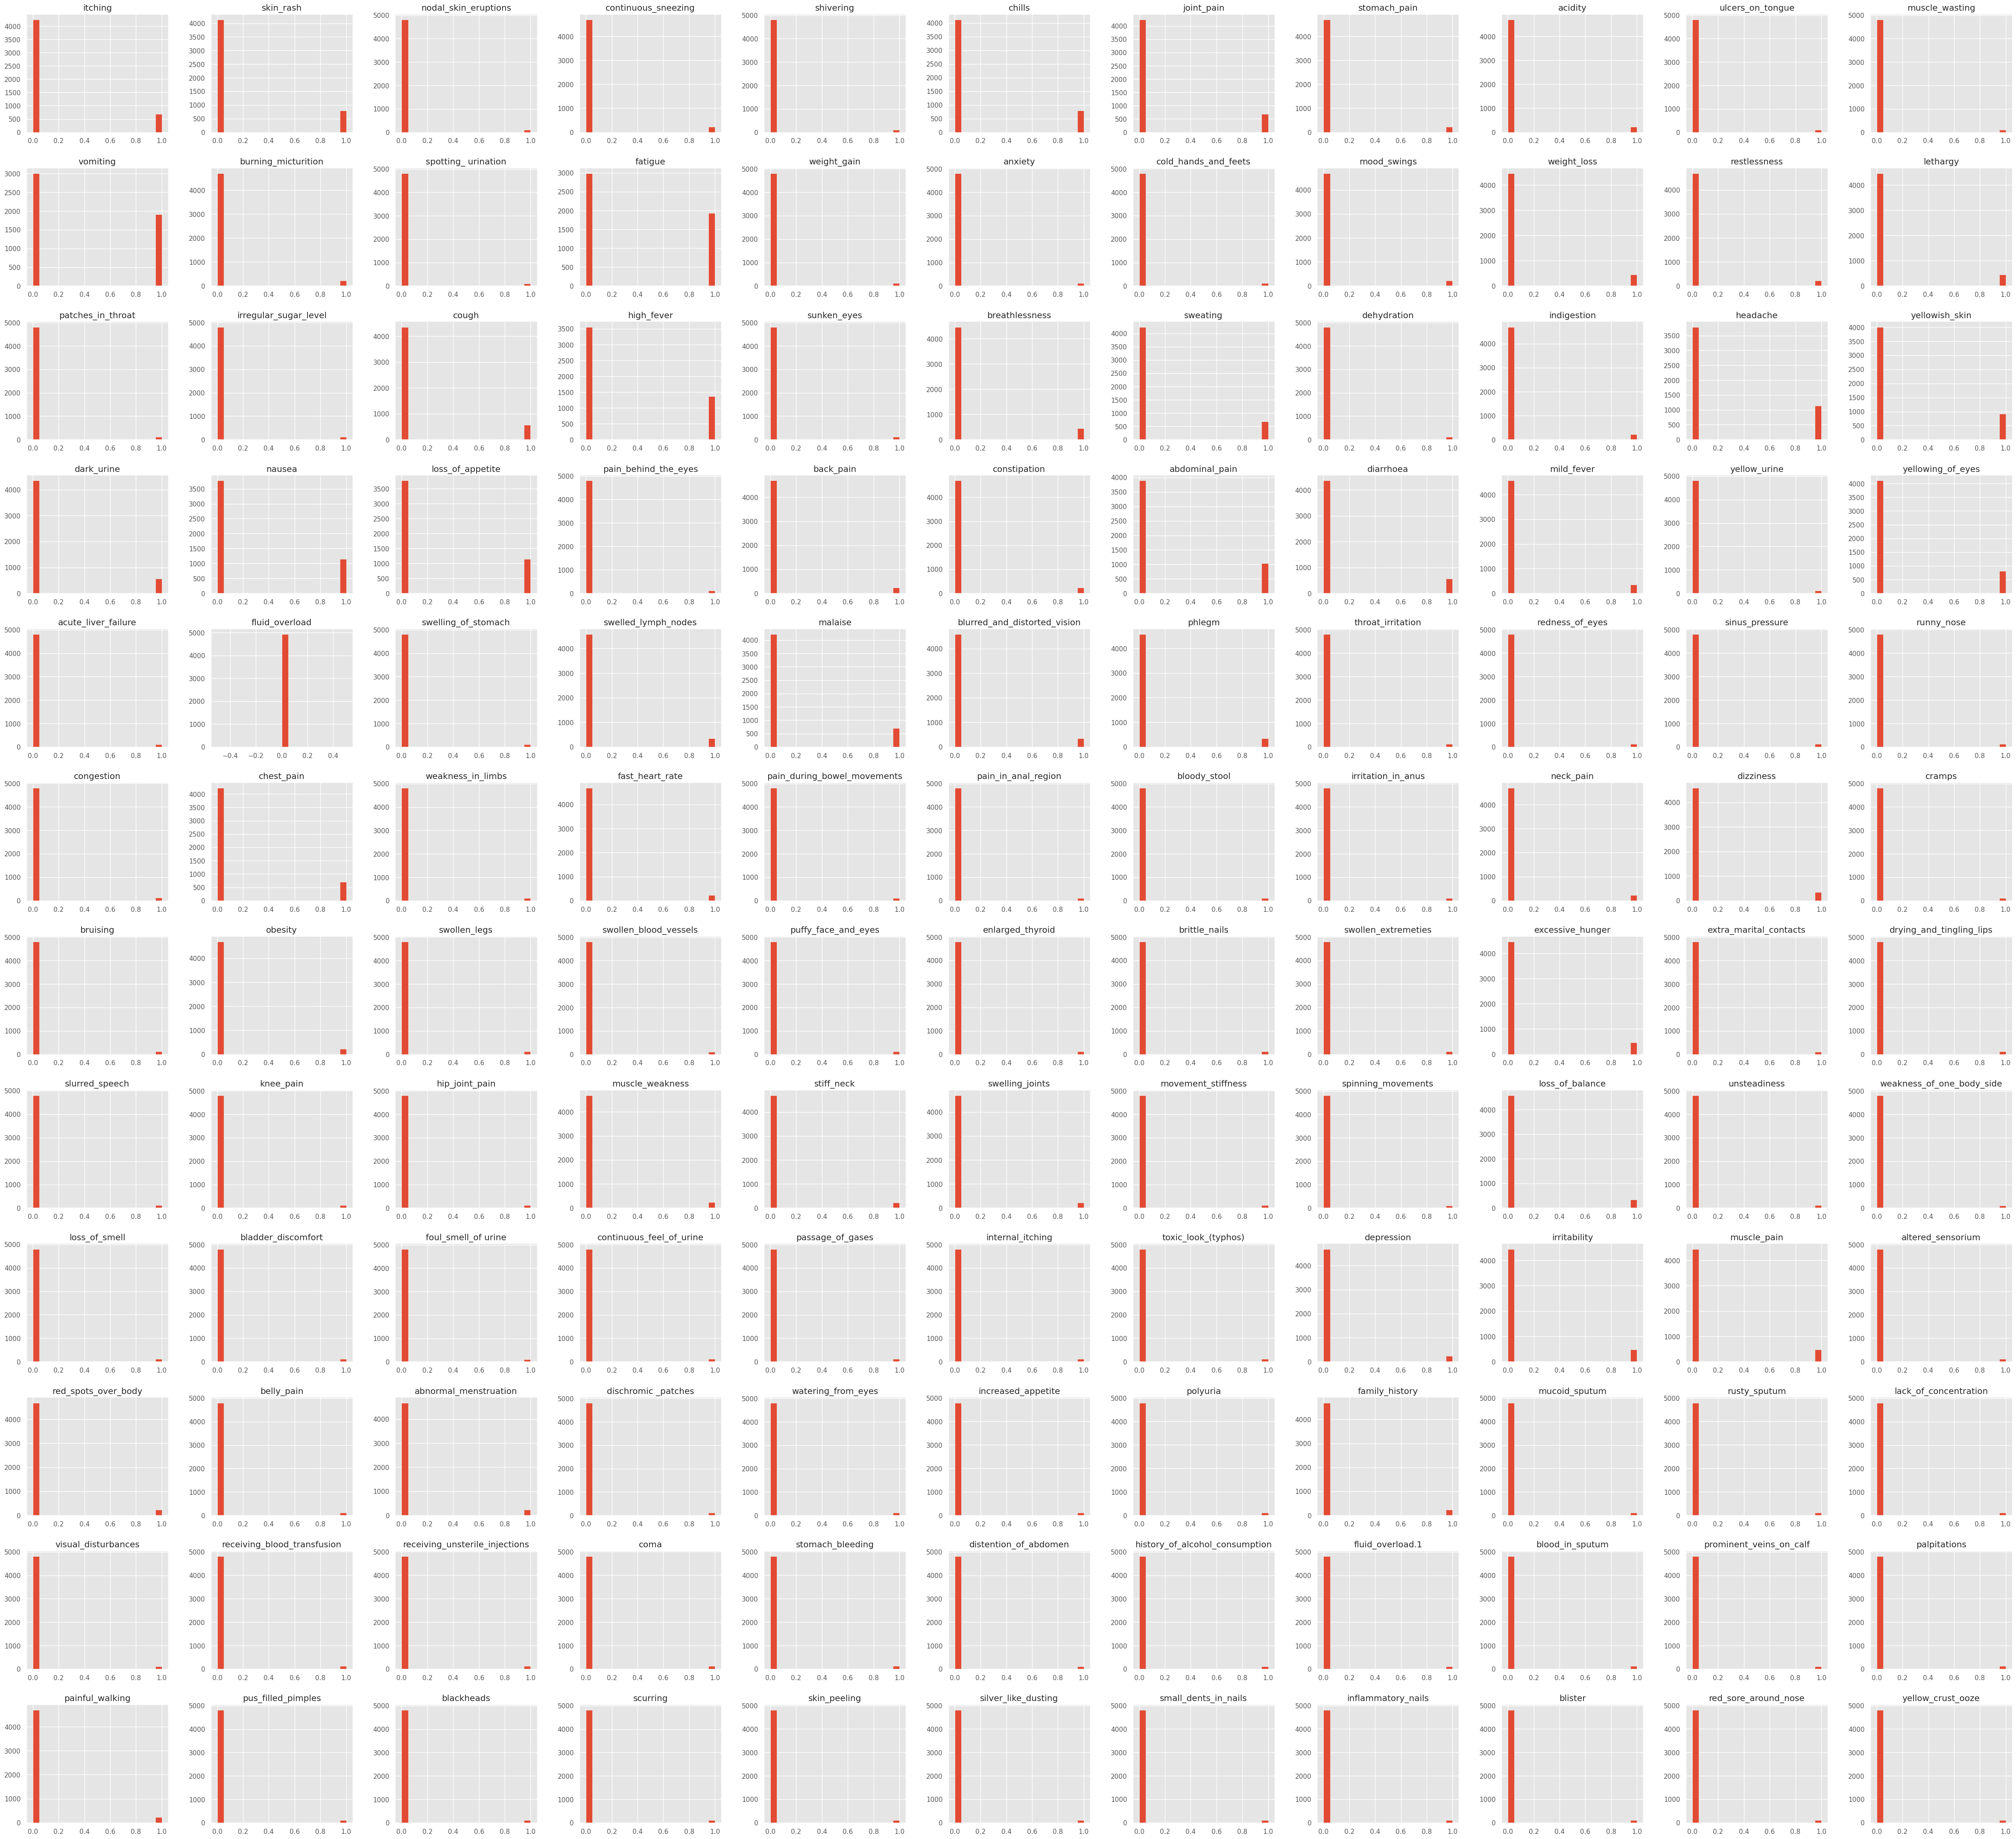

In [ ]:
plt.style.use("ggplot")
df_train.hist(figsize =(60,55),bins=20) #This line generates histograms for all numerical columns in the DataFrame
plt.show()

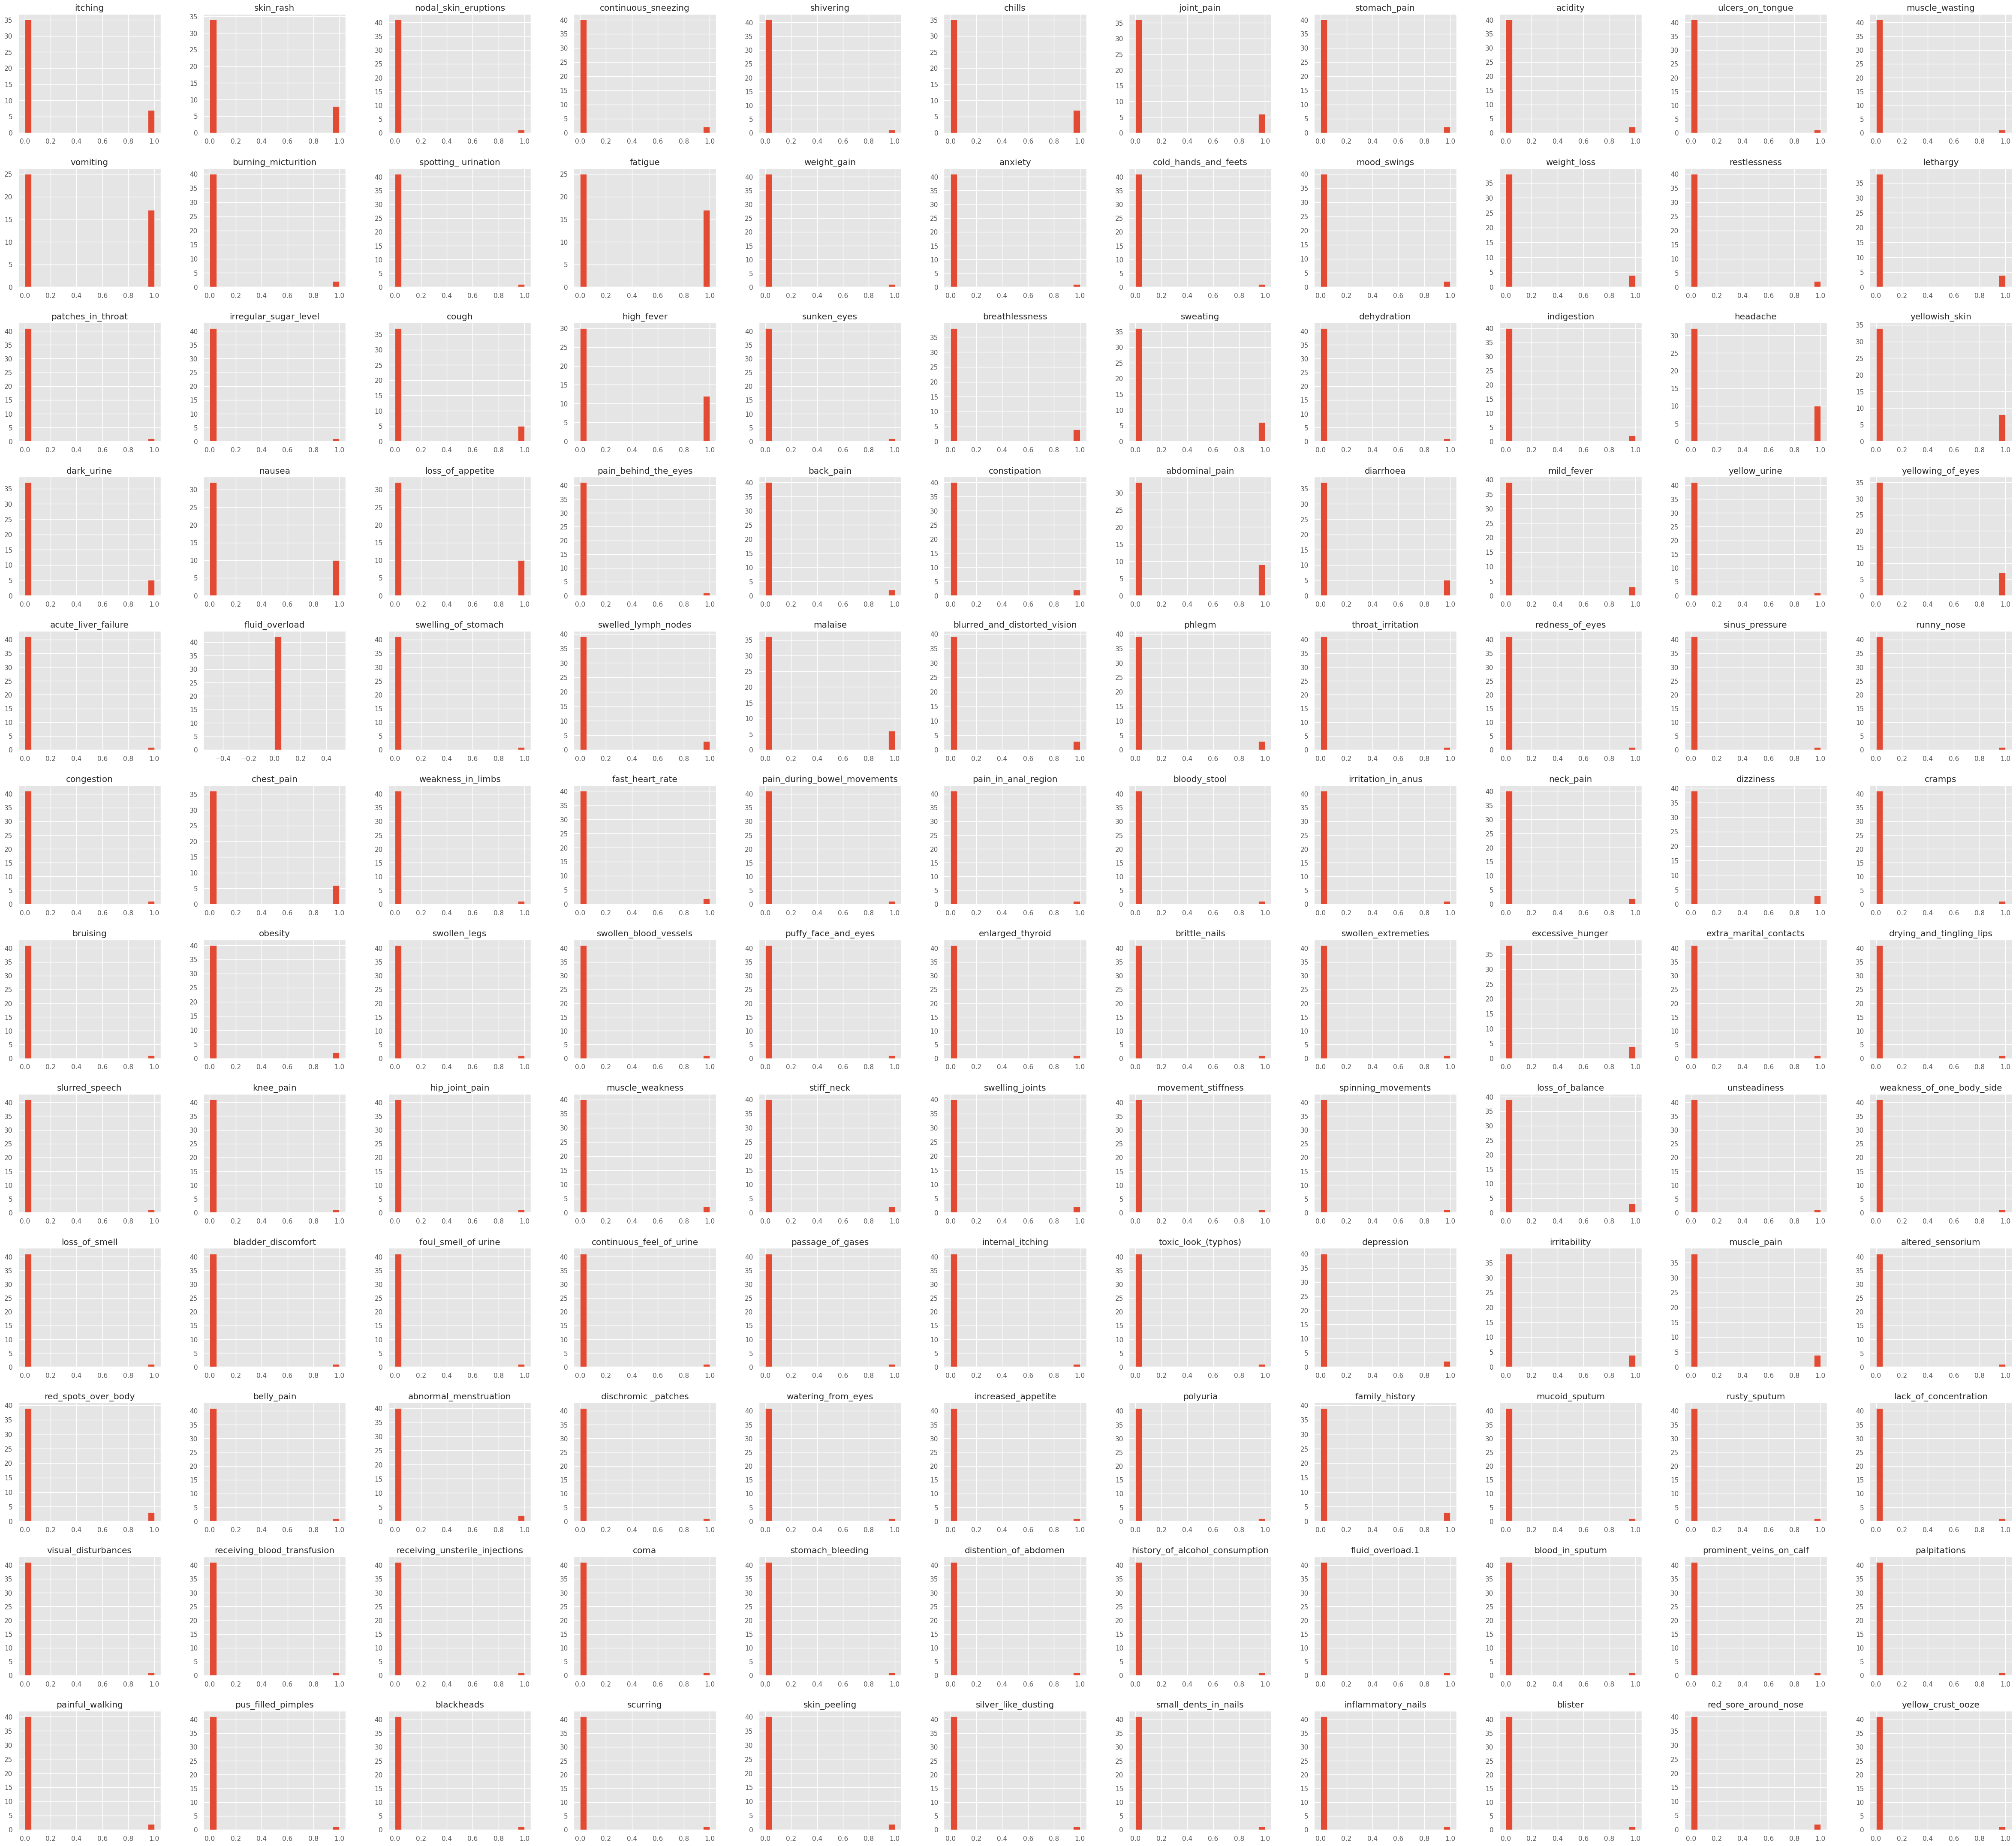

In [ ]:
plt.style.use("ggplot")
df_test.hist(figsize =(60,55),bins=20)
plt.show()

In [ ]:
# Assuming dftrain is your DataFrame
columns = list(df_train.columns)

# Set a Seaborn style
sns.set(style="whitegrid")

# Define colors
colors = ['red', 'yellow']

# Create subplots
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(5, 2 * len(columns)))

# Iterate through each column
for i, column in enumerate(columns):
    # Plot the count for each symptom
    sns.countplot(x=column, data=df_train, palette=colors, ax=axs[i])

    # Add labels and title
    axs[i].set_title("Count of Symptom \"" + column + "\"", fontsize=14)
    axs[i].set_xlabel(column, fontsize=12)
    axs[i].set_ylabel("Count", fontsize=12)

    # Add percentage labels on top of bars
    total = len(df_train[column])
    for p in axs[i].patches:
        height = p.get_height()
        axs[i].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{height/total:.1%}', ha="center", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

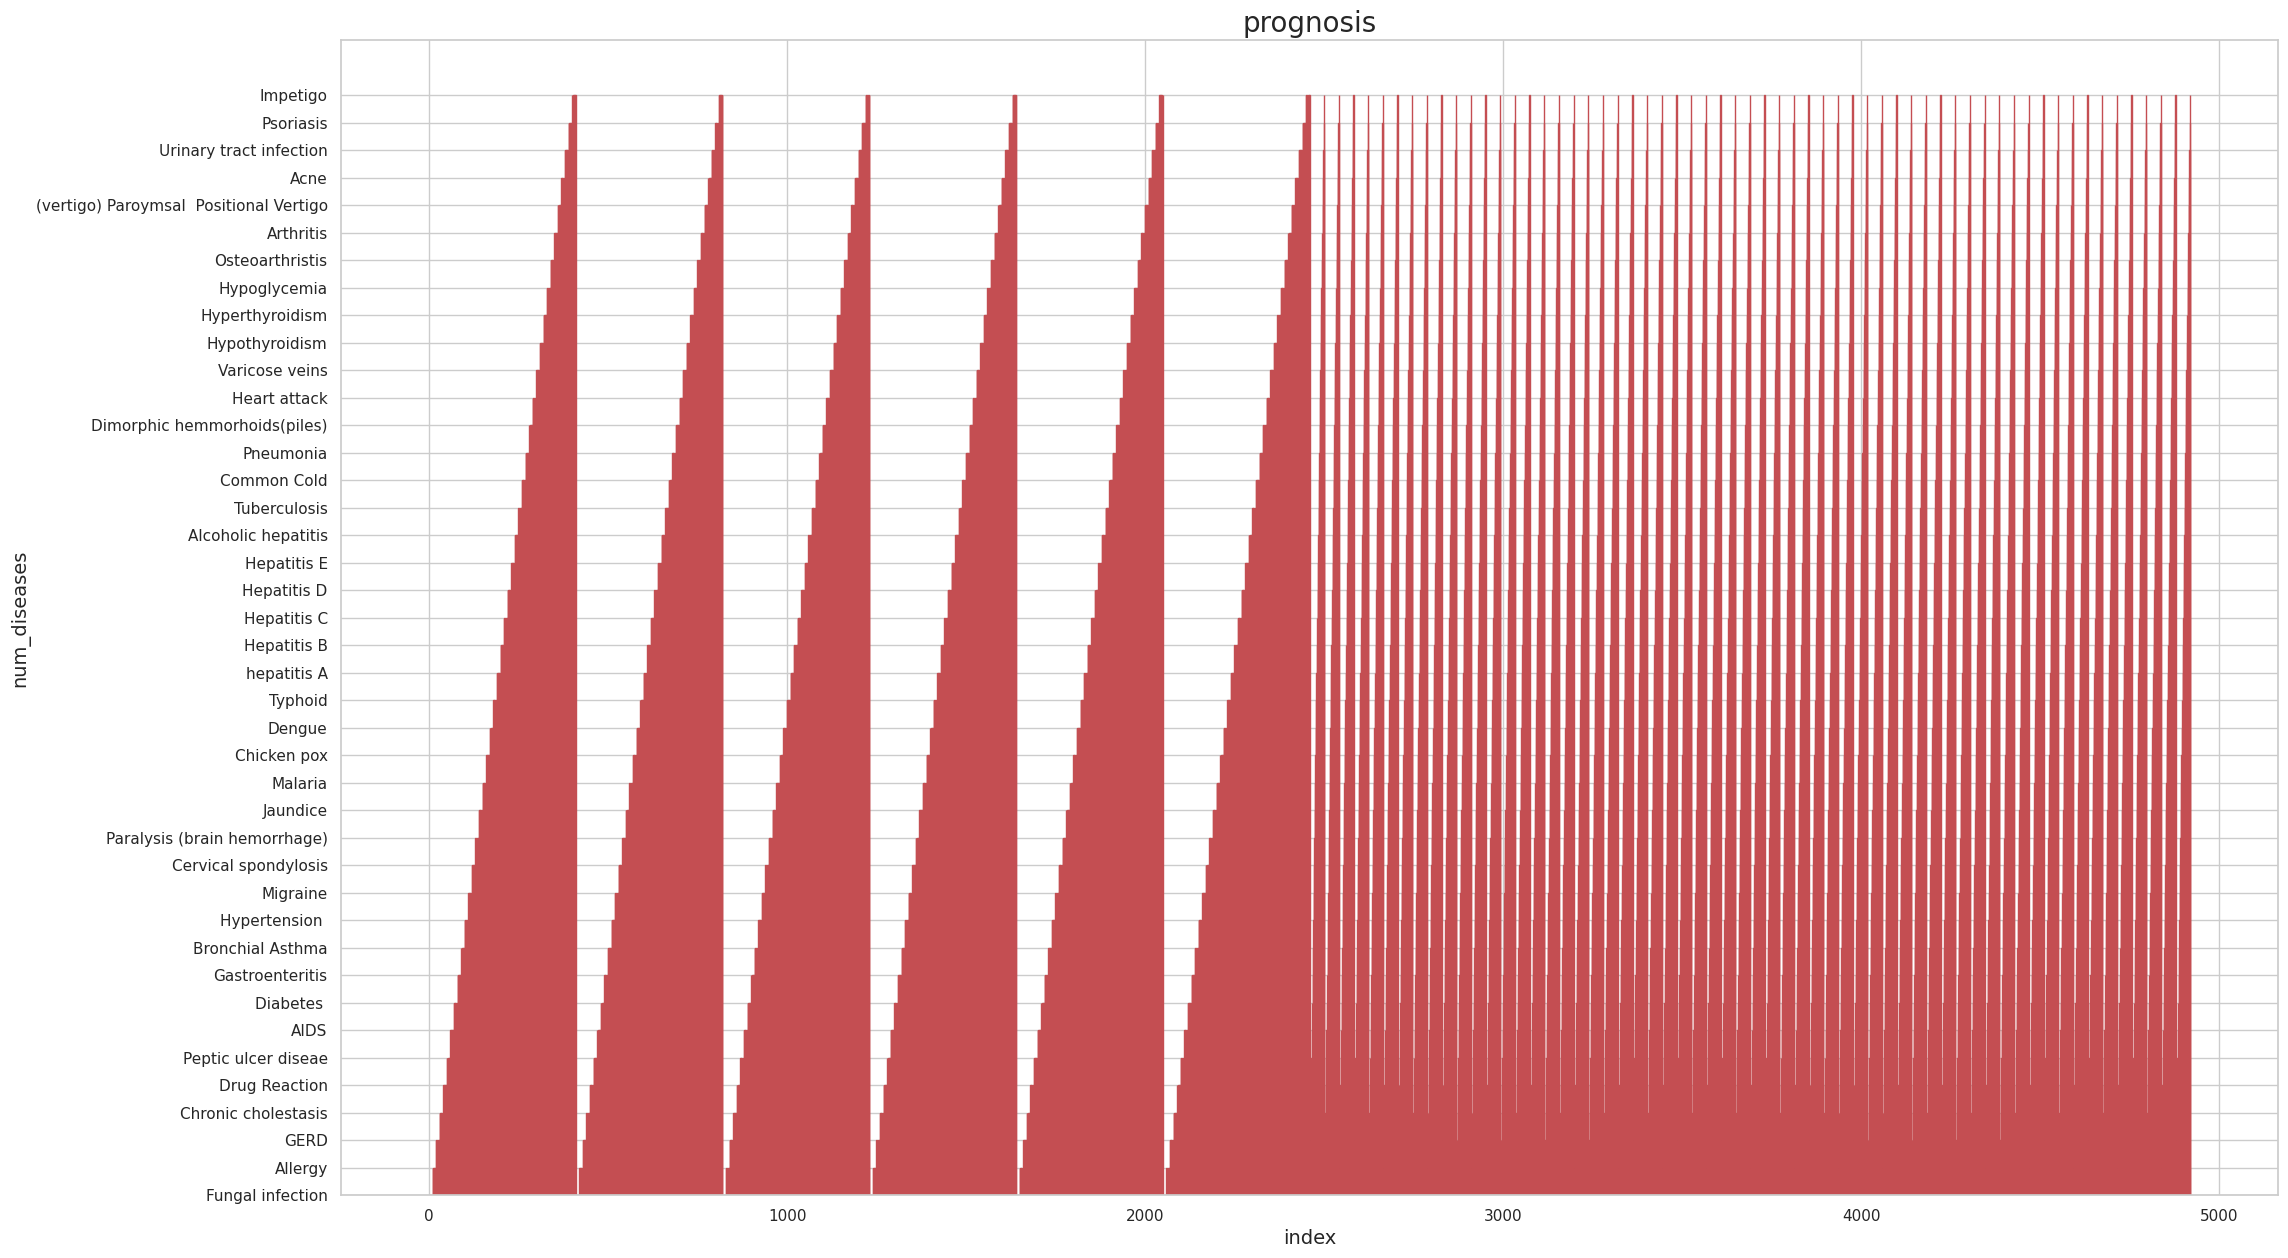

In [ ]:
plt.figure(figsize=(25,15))
plt.bar(df_train.index, df_train.prognosis, ec='r')

plt.title('prognosis', fontsize=20)
plt.xlabel('index', fontsize=14)
plt.ylabel('num_diseases', fontsize=14)
plt.show()

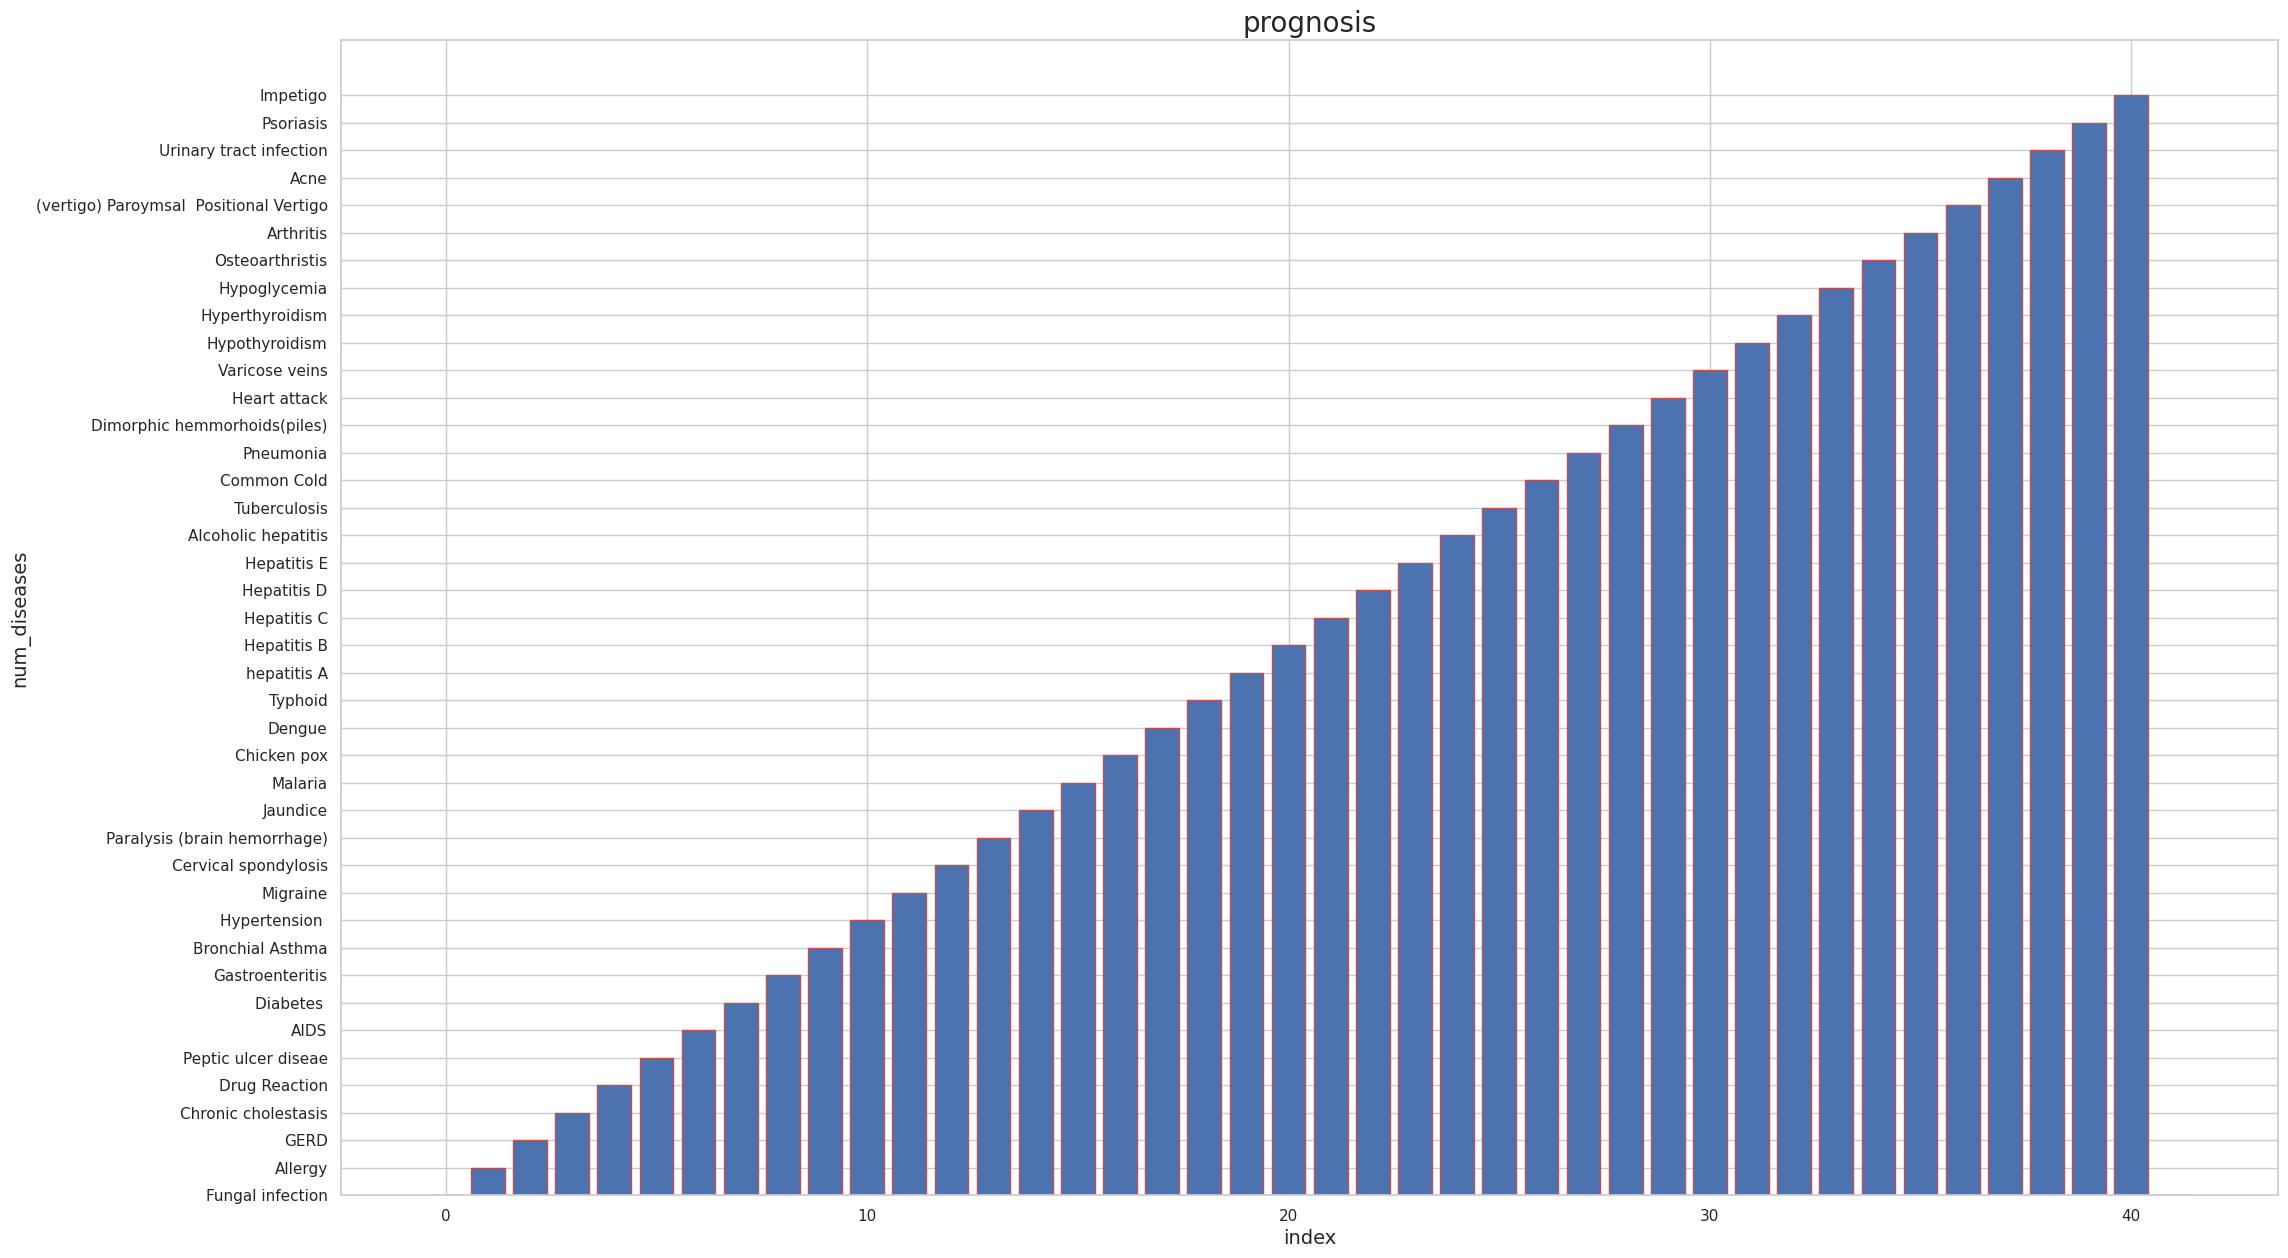

In [ ]:
plt.figure(figsize=(25,15))
plt.bar(df_test.index, df_test.prognosis, ec='r')

plt.title('prognosis', fontsize=20)
plt.xlabel('index', fontsize=14)
plt.ylabel('num_diseases', fontsize=14)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train["prognosis"] = le.fit_transform(df_train['prognosis'])
df_test["prognosis"] = le.fit_transform(df_test['prognosis'])

In [ ]:
# Features and labels for training
X_train = df_train.iloc[:, :-1]  # All columns except the last one (symptoms)
y_train = df_train.iloc[:, -1]   # The last column (prognosis)

# Features and labels for testing
X_test = df_test.iloc[:, :-1]    # All columns except the last one (symptoms)
y_test = df_test.iloc[:, -1]     # The last column (prognosis)

In [ ]:
df_train.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


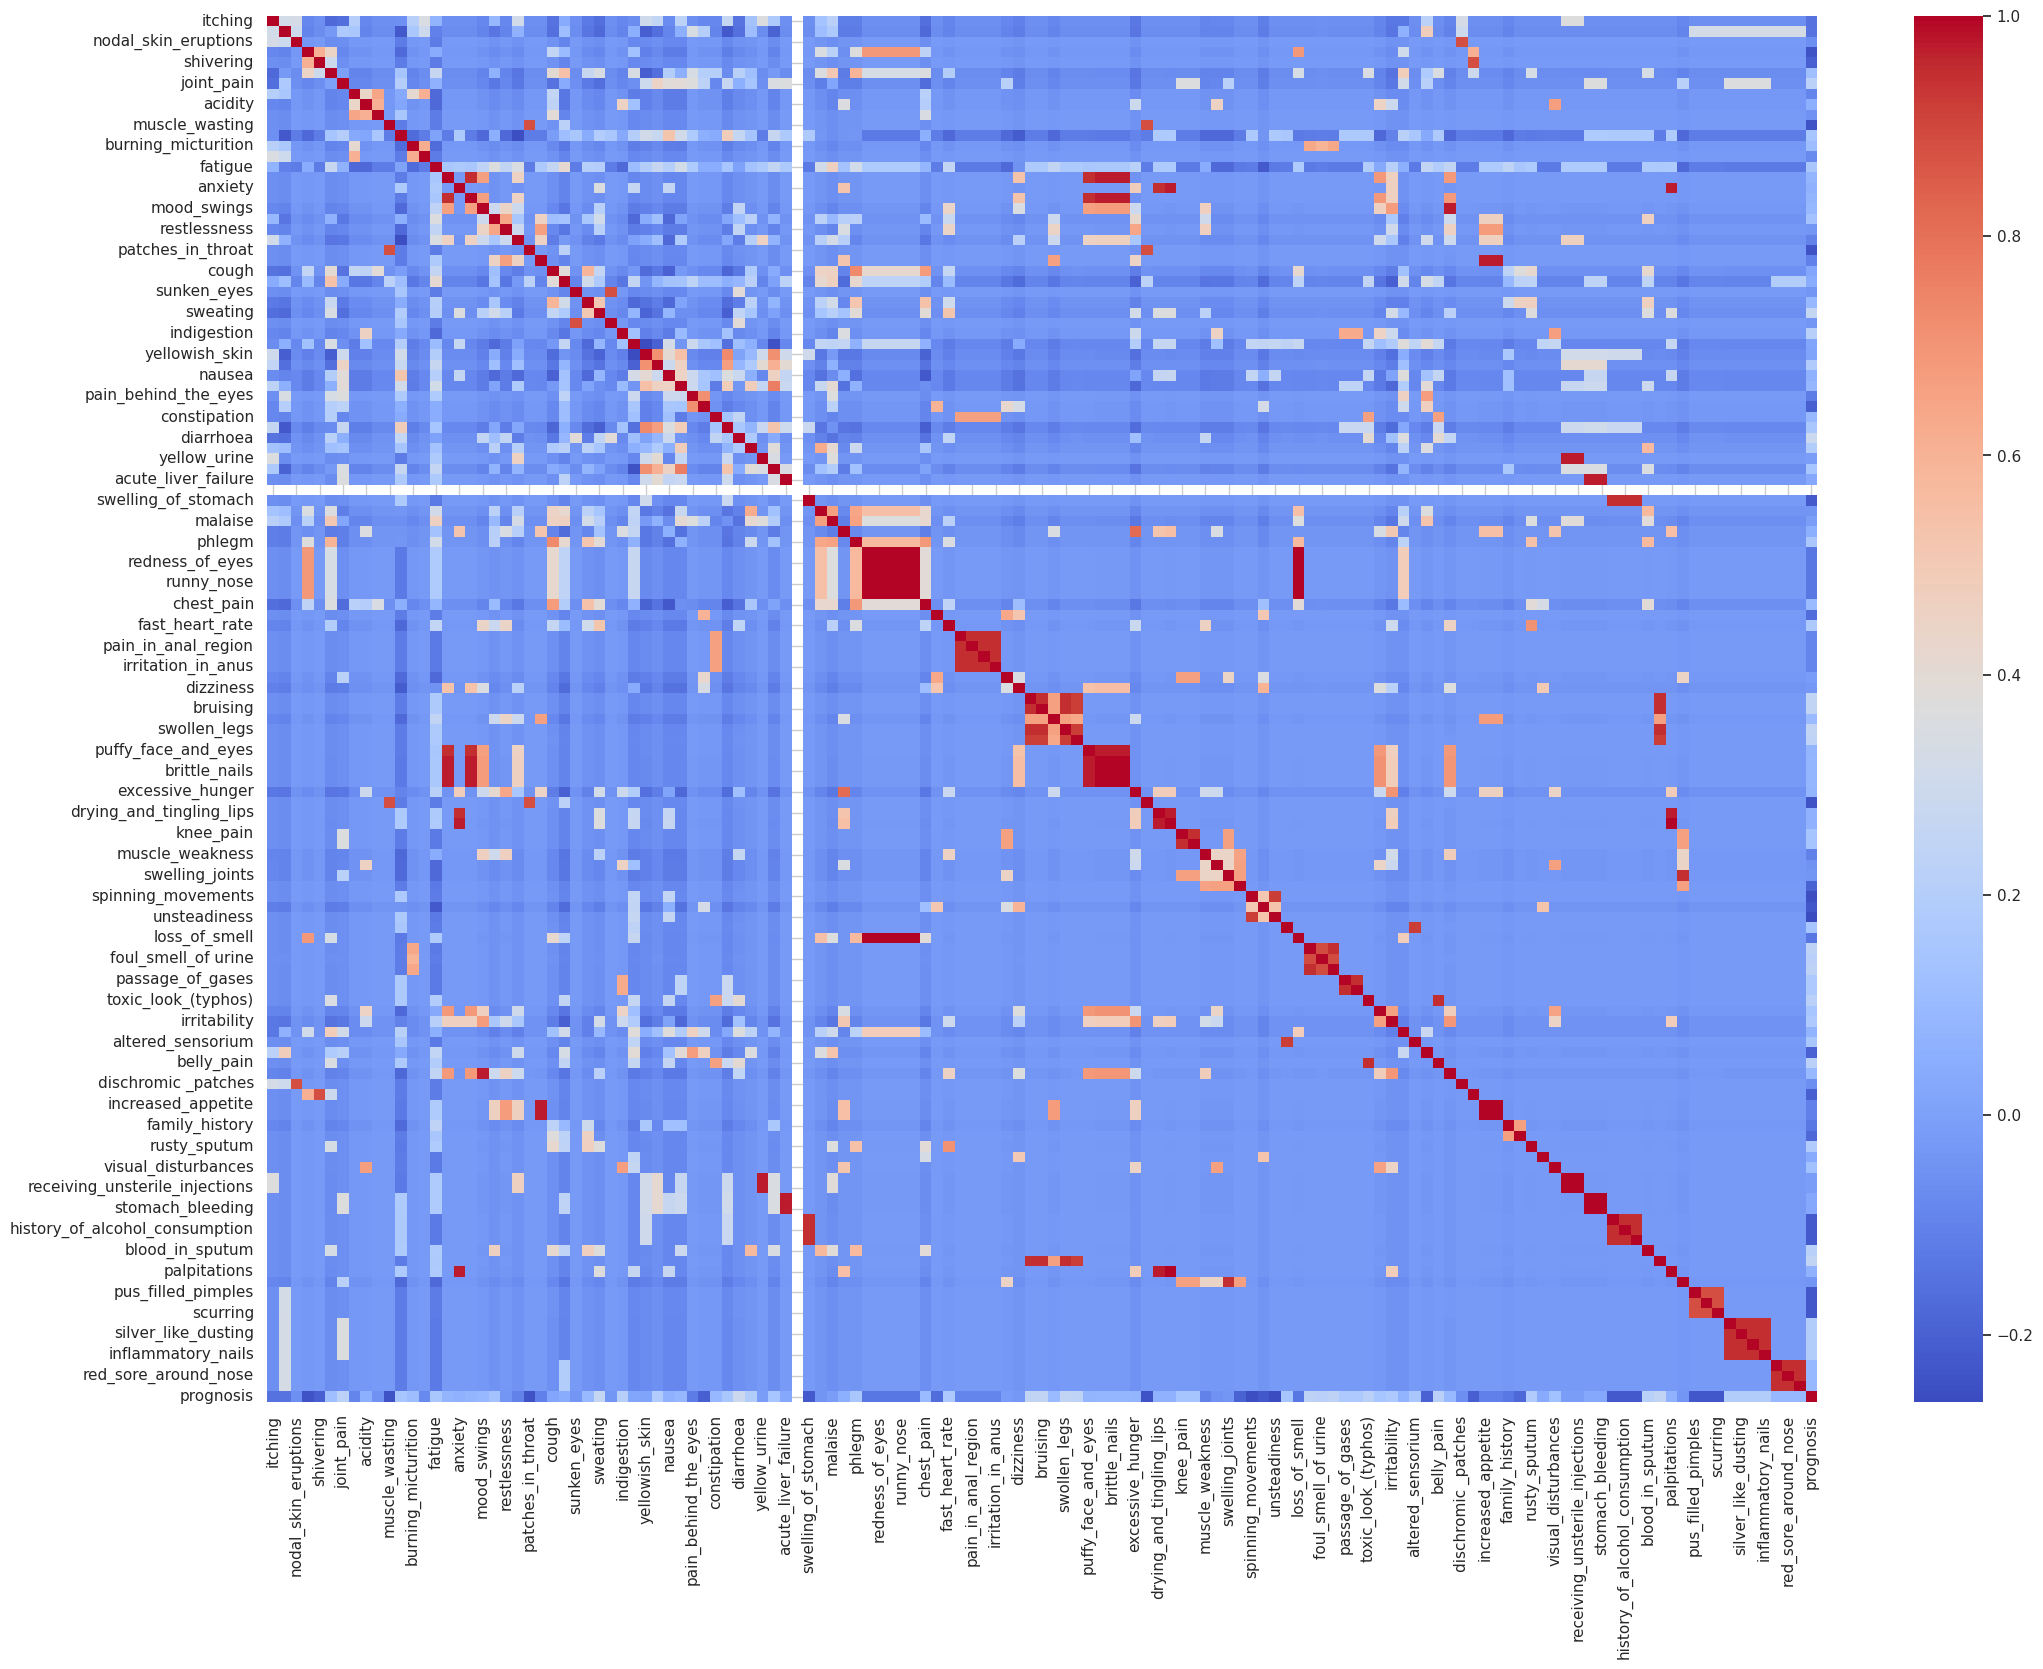

In [ ]:
plt.figure(figsize=(25, 18))
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=False)
plt.show()

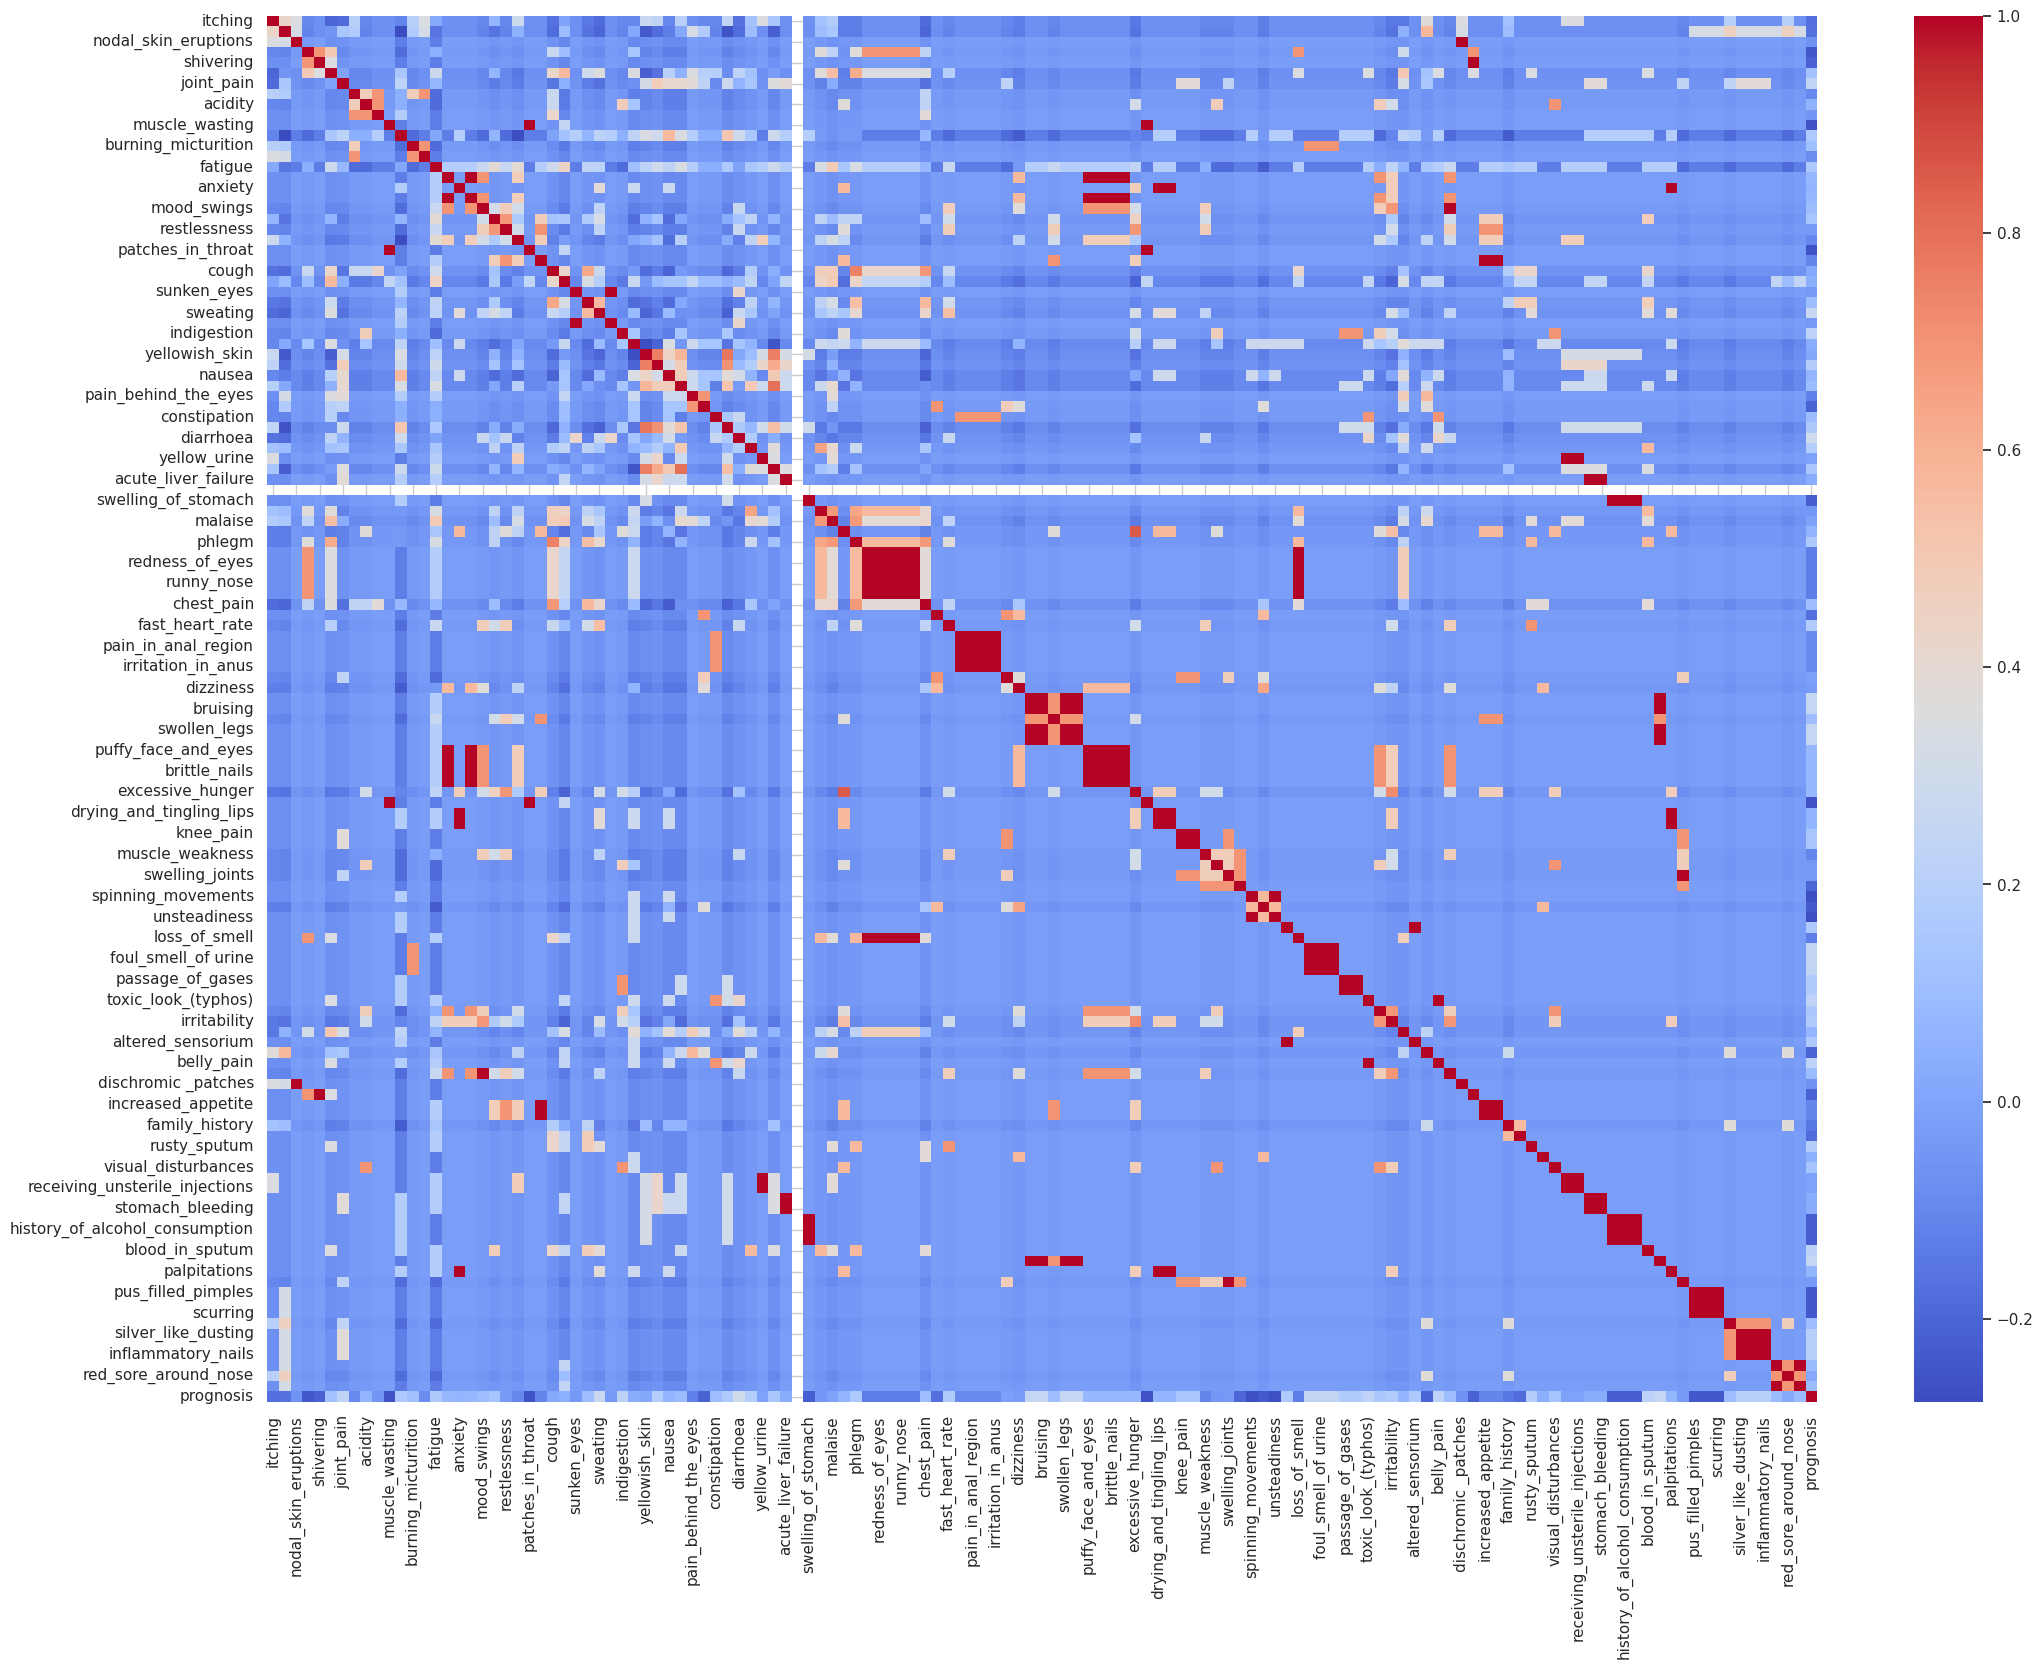

In [ ]:
plt.figure(figsize=(25, 18))
sns.heatmap(df_test.corr(), cmap='coolwarm', annot=False)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
linregressor = LinearRegression()
linregressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linregressor.predict(X_test)

In [ ]:
print(linregressor.score(X_test , y_test)*100)
print(linregressor.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_pred))

99.28257548472936
97.81335974379066
mean_squared_error= 0.9846488790793461


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dectreeregressor = DecisionTreeRegressor(max_depth=10,random_state=42,min_samples_split=2)
dectreeregressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
y_pred = dectreeregressor.predict(X_test)

In [ ]:
print("score_test=", dectreeregressor.score(X_test , y_test)*100)
print("score_train=", dectreeregressor.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_pred))

score_test= 86.59711237728
score_train= 80.87793429787003
mean_squared_error= 18.395159341828947


In [ ]:
from sklearn.ensemble import RandomForestRegressor
randforestregressor = RandomForestRegressor(n_estimators=200,max_depth=10,random_state=42 ,min_samples_split=2)
randforestregressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
y_pred = randforestregressor.predict(X_test)

In [ ]:
print("score_test=", randforestregressor.score(X_test , y_test)*100)
print("score_train=", randforestregressor.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_pred))

score_test= 87.27555053013985
score_train= 82.3108520304833
mean_squared_error= 17.464018361113894


In [ ]:
from sklearn.svm import SVR
svregressor = SVR(kernel='linear', C=2.0, epsilon=0.2)
svregressor.fit(X_train, y_train)

SVR(C=2.0, epsilon=0.2, kernel='linear')

In [ ]:
y_pred = svregressor.predict(X_test)

In [ ]:
print("score_test=", svregressor.score(X_test , y_test)*100)
print("score_train=", svregressor.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_pred))

score_test= 99.91140658984237
score_train= 97.05305310395127
mean_squared_error= 0.12159244652046611


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import linear_model

In [ ]:
GBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.5, n_estimators=200, max_depth=10)
KNN = KNeighborsRegressor(n_neighbors=6)
RidgeRegressionModel = linear_model.Ridge(alpha=1, random_state= 67)

In [ ]:
VotingRegressorModel = VotingRegressor([('GBR', GBR), ('KNN', KNN), ('RRM',RidgeRegressionModel)])
VotingRegressorModel.fit(X_train, y_train)

VotingRegressor(estimators=[('GBR',
                             GradientBoostingRegressor(learning_rate=0.5,
                                                       max_depth=10,
                                                       n_estimators=200)),
                            ('KNN', KNeighborsRegressor(n_neighbors=6)),
                            ('RRM', Ridge(alpha=1, random_state=67))])

In [ ]:
y_pred = VotingRegressorModel.predict(X_test)

In [ ]:
print("score_test=", VotingRegressorModel.score(X_test , y_test)*100)
print("score_train=", VotingRegressorModel.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_pred))

score_test= 99.91562102599248
score_train= 99.75440275199485
mean_squared_error= 0.11580822846991223
